In [1]:
import sqlite3
import pandas as pd


In [ ]:
db_file = r'C:\Users\ricar\OneDrive\Documents\4Geeks_Projects\Fuel_Efficiency_Project\fuel_data.db'

table_name = 'vehicle_features'

csv_file = r'C:\Users\ricar\OneDrive\Documents\4Geeks_Projects\Fuel_Efficiency_Project\vehicle_features.csv'

conn = sqlite3.connect('fuel_data.db')

df = pd.read_sql_query("SELECT * FROM vehicle_features", conn)

df.to_csv(csv_file, index=False)

conn.close()

print('CSV file created successfully.')

In [3]:
# File path
file_path = r'C:\Users\ricar\OneDrive\Documents\4Geeks_Projects\Fuel_Efficiency_Project\vehicle_features.csv'

# Reading the CSV file, setting low_memory to False to avoid DtypeWarning
# This option is used to efficiently load large files
try:
    data = pd.read_csv(file_path, low_memory=False)
except Exception as e:
    error_message = str(e)

# Checking if the data is loaded successfully or not
if 'data' in locals():
    success_message = "Data loaded successfully. Here's the first few rows:"
    preview = data.head()
else:
    success_message = ""
    preview = error_message

success_message, preview



("Data loaded successfully. Here's the first few rows:",
         id  atvtype  barrels08  barrelsA08  charge120  charge240  city08  \
 0      1.0      NaN  14.167143         0.0        0.0        0.0    19.0   
 1     10.0      NaN  27.046364         0.0        0.0        0.0     9.0   
 2    100.0      NaN  11.018889         0.0        0.0        0.0    23.0   
 3   1000.0      NaN  27.046364         0.0        0.0        0.0    10.0   
 4  10000.0      NaN  15.658421         0.0        0.0        0.0    17.0   
 
    city08U  cityA08  cityA08U  ...  c240Dscr  charge240b  c240bDscr  \
 0      0.0      0.0       0.0  ...       NaN         0.0        NaN   
 1      0.0      0.0       0.0  ...       NaN         0.0        NaN   
 2      0.0      0.0       0.0  ...       NaN         0.0        NaN   
 3      0.0      0.0       0.0  ...       NaN         0.0        NaN   
 4      0.0      0.0       0.0  ...       NaN         0.0        NaN   
 
                    createdOn                

In [4]:
data.shape

(47083, 82)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47083 entries, 0 to 47082
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               47075 non-null  float64
 1   atvtype          0 non-null      float64
 2   barrels08        47075 non-null  float64
 3   barrelsA08       47075 non-null  float64
 4   charge120        47075 non-null  float64
 5   charge240        47075 non-null  float64
 6   city08           47075 non-null  float64
 7   city08U          47075 non-null  float64
 8   cityA08          47075 non-null  float64
 9   cityA08U         47075 non-null  float64
 10  cityCD           47075 non-null  float64
 11  cityE            47075 non-null  float64
 12  cityUF           47075 non-null  float64
 13  co2              47075 non-null  float64
 14  co2A             47075 non-null  float64
 15  co2TailpipeAGpm  47075 non-null  float64
 16  co2TailpipeGpm   47075 non-null  float64
 17  comb08      

In [8]:
data = data[data['combE'] == 0]

In [9]:
data = data[data['fuelType1'] != 'Natural Gas']

In [15]:
irrelevant_cols = ['atvtype','basemodel','emissionsList','mpgData', 'mfrCode', 'createdOn', 'modifiedOn', 'charge120', 'charge240', 'cityE', 'combE', 'phevBlended',
                        'charge240b', 'phevCity', 'phevHwy', 'phevComb', 'cityCD', 'cityUF', 'combinedCD', 'combinedUF', 'highwayCD', 
                       'highwayE', 'highwayUF', 'c240Dscr', 'c240bDscr', 'evMotor', 'fuelType2', 'barrelsA08', 'cityA08', 'cityA08U', 'co2A', 'co2TailpipeAGpm',
                        'combA08', 'combA08U', 'fuelCostA08', 'highwayA08', 'highwayA08U', 'rangeCityA', 'rangeHwyA', 'UCityA', 'UHighwayA', 'co2TailpipeGpm', 'comb08U', 'ghgScore',
                        'ghgScoreA', 'highway08U', 'youSaveSpend', 'rangeA', 'fuelCost08', 'feScore', 'co2', 'engId', 'city08U', 'fuelType']

In [16]:
data.drop(irrelevant_cols, axis=1, inplace=True)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46024 entries, 0 to 47082
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          46024 non-null  float64
 1   barrels08   46024 non-null  float64
 2   city08      46024 non-null  float64
 3   comb08      46024 non-null  float64
 4   cylinders   46021 non-null  float64
 5   displ       46022 non-null  float64
 6   drive       44846 non-null  object 
 7   eng_dscr    29402 non-null  object 
 8   fuelType1   46024 non-null  object 
 9   guzzler     2751 non-null   object 
 10  highway08   46024 non-null  float64
 11  hlv         46024 non-null  float64
 12  hpv         46024 non-null  float64
 13  lv2         46024 non-null  float64
 14  lv4         46024 non-null  float64
 15  make        46024 non-null  object 
 16  model       46024 non-null  object 
 17  pv2         46024 non-null  float64
 18  pv4         46024 non-null  float64
 19  trans_dscr  14999 non-null  ob

In [21]:
data['startStop'] = data['startStop'].fillna('N')
data['startStop'].value_counts()

startStop
N    39429
Y     6595
Name: count, dtype: int64

In [23]:
data['tCharger'] = data['tCharger'].fillna('N')
data['tCharger'].value_counts()

tCharger
N    36126
T     9898
Name: count, dtype: int64

In [24]:
data['sCharger'] = data['sCharger'].fillna('N')
data['sCharger'].value_counts()

sCharger
N    45055
S      969
Name: count, dtype: int64

In [26]:
data['guzzler'] = data['guzzler'].fillna('N')
data['guzzler'].value_counts()

guzzler
N    43273
G     1772
T      964
S       15
Name: count, dtype: int64

In [27]:
convert_to_binary = ['startStop', 'tCharger', 'sCharger', 'guzzler']

for col in convert_to_binary:
    data[col] = data[col].replace({'Y': 1, 'G': 1, 'T': 1, 'S': 1, 'N': 0})


In [29]:
for col in convert_to_binary:
    print(data[col].value_counts())


startStop
0    39429
1     6595
Name: count, dtype: int64
tCharger
0    36126
1     9898
Name: count, dtype: int64
sCharger
0    45055
1      969
Name: count, dtype: int64
guzzler
0    43273
1     2751
Name: count, dtype: int64


In [31]:
data['id'] = data['id'].astype(str)

In [32]:
data.describe()

barrels08        city08        comb08     cylinders        displ  \
count  46024.000000  46024.000000  46024.000000  46021.000000  46022.00000   
mean      15.535368     18.226317     20.520142      5.712001      3.28255   
std        3.956607      5.183064      5.422728      1.772642      1.35518   
min        5.042542      6.000000      7.000000      2.000000      0.90000   
25%       12.935217     15.000000     17.000000      4.000000      2.20000   
50%       14.875500     17.000000     20.000000      6.000000      3.00000   
75%       17.500588     21.000000     23.000000      6.000000      4.20000   
max       42.501429     58.000000     59.000000     16.000000      8.40000   

            guzzler     highway08           hlv           hpv           lv2  \
count  46024.000000  46024.000000  46024.000000  46024.000000  46024.000000   
mean       0.059773     24.455501      1.877890      9.594559      1.760777   
std        0.237069      6.020236      5.768058     27.252273      4.293540   
min        0.000000      9.000000      0.000000      0.000000      0.000000   
25%        0.000000     20.000000      0.000000      0.000000      0.000000   
50%        0.000000     24.000000      0.000000      0.000000      0.000000   
75%        0.000000     28.000000      0.000000      0.000000      0.000000   
max        1.000000     61.000000     49.000000    195.000000     41.000000   

                lv4           pv2           pv4         UCity      UHighway  \
count  46024.000000  46024.000000  46024.000000  46024.000000  46024.000000   
mean       5.898835     13.332848     32.885842     23.003580     34.382976   
std        9.463942     30.852687     45.859822      7.234535      9.012731   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000     18.500000     28.000000   
50%        0.000000      0.000000      0.000000     21.800000     33.548100   
75%       13.000000      0.000000     91.000000     26.100000     39.524300   
max       55.000000    194.000000    192.000000     83.559800     89.202900   

               year      sCharger      tCharger     startStop  
count  46024.000000  46024.000000  46024.000000  46024.000000  
mean    2003.774400      0.021054      0.215062      0.143295  
std       12.345138      0.143567      0.410870      0.350377  
min     1984.000000      0.000000      0.000000      0.000000  
25%     1992.000000      0.000000      0.000000      0.000000  
50%     2005.000000      0.000000      0.000000      0.000000  
75%     2015.000000      0.000000      0.000000      0.000000  
max     2024.000000      1.000000      1.000000      1.000000

In [33]:
# Checking for missing values and data types
missing_values = data.isnull().sum()
data_types = data.dtypes

missing_values, data_types



(id                0
 barrels08         0
 city08            0
 comb08            0
 cylinders         3
 displ             2
 drive          1178
 eng_dscr      16622
 fuelType1         0
 guzzler           0
 highway08         0
 hlv               0
 hpv               0
 lv2               0
 lv4               0
 make              0
 model             0
 pv2               0
 pv4               0
 trans_dscr    31025
 trany             2
 UCity             0
 UHighway          0
 VClass            0
 year              0
 sCharger          0
 tCharger          0
 startStop         0
 dtype: int64,
 id             object
 barrels08     float64
 city08        float64
 comb08        float64
 cylinders     float64
 displ         float64
 drive          object
 eng_dscr       object
 fuelType1      object
 guzzler         int64
 highway08     float64
 hlv           float64
 hpv           float64
 lv2           float64
 lv4           float64
 make           object
 model          object
 pv2  

In [34]:
data['eng_dscr']

0             (FFS)
1         (GUZZLER)
2             (FFS)
3               NaN
4        (FFS,TRBO)
            ...    
47078         (FFS)
47079         (FFS)
47080         (FFS)
47081         (FFS)
47082    (FFS,TRBO)
Name: eng_dscr, Length: 46024, dtype: object

In [37]:
data.drop('eng_dscr', axis=1, inplace=True)


In [38]:
data['trans_dscr']

0          NaN
1          NaN
2          SIL
3          NaN
4          NaN
         ...  
47078    CLKUP
47079      NaN
47080    CLKUP
47081      NaN
47082    CLKUP
Name: trans_dscr, Length: 46024, dtype: object

In [39]:
data.drop('trans_dscr', axis=1, inplace=True)

In [42]:
# Dropping rows where 'cylinders', 'displ', or 'trany' have missing values
data = data.dropna(subset=['cylinders', 'displ', 'trany'])

# Checking if the rows have been dropped successfully
remaining_missing_values = data.isnull().sum()
remaining_missing_values

id              0
barrels08       0
city08          0
comb08          0
cylinders       0
displ           0
drive        1178
fuelType1       0
guzzler         0
highway08       0
hlv             0
hpv             0
lv2             0
lv4             0
make            0
model           0
pv2             0
pv4             0
trany           0
UCity           0
UHighway        0
VClass          0
year            0
sCharger        0
tCharger        0
startStop       0
dtype: int64

In [44]:
# Creating an 'Unknown' category for missing values in the 'drive' column
data.loc[:, 'drive'] = data['drive'].fillna('Unknown')

# Verifying that there are no more missing values in the 'drive' column
updated_missing_values_drive = data['drive'].isnull().sum()
updated_drive_value_counts = data['drive'].value_counts()

updated_missing_values_drive, updated_drive_value_counts



(0,
 drive
 Front-Wheel Drive             15178
 Rear-Wheel Drive              15033
 4-Wheel or All-Wheel Drive     6643
 All-Wheel Drive                4763
 4-Wheel Drive                  2247
 Unknown                        1178
 2-Wheel Drive                   491
 Part-time 4-Wheel Drive         486
 Name: count, dtype: int64)

In [45]:
numerical_cols = [col for col in data.columns if data[col].dtype in ['int64', 'float64']]

categorical_cols = [col for col in data.columns if data[col].dtype == 'object']

print('Numerical columns: ', numerical_cols)
print('Categorical columns: ', categorical_cols)

Numerical columns:  ['barrels08', 'city08', 'comb08', 'cylinders', 'displ', 'guzzler', 'highway08', 'hlv', 'hpv', 'lv2', 'lv4', 'pv2', 'pv4', 'UCity', 'UHighway', 'year', 'sCharger', 'tCharger', 'startStop']
Categorical columns:  ['id', 'drive', 'fuelType1', 'make', 'model', 'trany', 'VClass']


In [46]:
for col in categorical_cols:
    print('Column name: ', col)
    print('Number of unique values: ', data[col].nunique())
    print(data[col].value_counts())
    print('---------------------------------------')

Column name:  id
Number of unique values:  46019
id
1.0        1
38160.0    1
38142.0    1
38143.0    1
38144.0    1
          ..
23999.0    1
24.0       1
240.0      1
2400.0     1
9999.0     1
Name: count, Length: 46019, dtype: int64
---------------------------------------
Column name:  drive
Number of unique values:  8
drive
Front-Wheel Drive             15178
Rear-Wheel Drive              15033
4-Wheel or All-Wheel Drive     6643
All-Wheel Drive                4763
4-Wheel Drive                  2247
Unknown                        1178
2-Wheel Drive                   491
Part-time 4-Wheel Drive         486
Name: count, dtype: int64
---------------------------------------
Column name:  fuelType1
Number of unique values:  4
fuelType1
Regular Gasoline     30160
Premium Gasoline     14423
Diesel                1274
Midgrade Gasoline      162
Name: count, dtype: int64
---------------------------------------
Column name:  make
Number of unique values:  132
make
Chevrolet                 

In [47]:
for col in numerical_cols:
    print('Column name: ', col)
    print('Number of unique values: ', data[col].nunique())
    print(data[col].value_counts())
    print('---------------------------------------')

Column name:  barrels08
Number of unique values:  79
barrels08
16.528333    4166
15.658421    3991
14.167143    3921
14.875500    3794
17.500588    2928
             ... 
9.158846        4
5.129483        4
5.219474        2
5.042542        2
8.712073        1
Name: count, Length: 79, dtype: int64
---------------------------------------
Column name:  city08
Number of unique values:  52
city08
15.0    4937
18.0    4439
17.0    4405
16.0    4352
19.0    3430
14.0    3254
21.0    2900
20.0    2689
13.0    2276
22.0    2079
23.0    1732
12.0    1667
11.0    1464
24.0    1087
25.0     918
26.0     764
27.0     634
10.0     549
28.0     474
29.0     350
31.0     245
30.0     229
9.0      210
33.0     107
8.0      103
32.0      87
35.0      74
43.0      58
40.0      48
34.0      46
36.0      42
38.0      42
37.0      35
7.0       34
41.0      34
39.0      26
51.0      25
42.0      25
53.0      21
48.0      20
49.0      17
44.0      15
45.0      12
54.0       9
58.0       9
55.0       8
46.0  

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

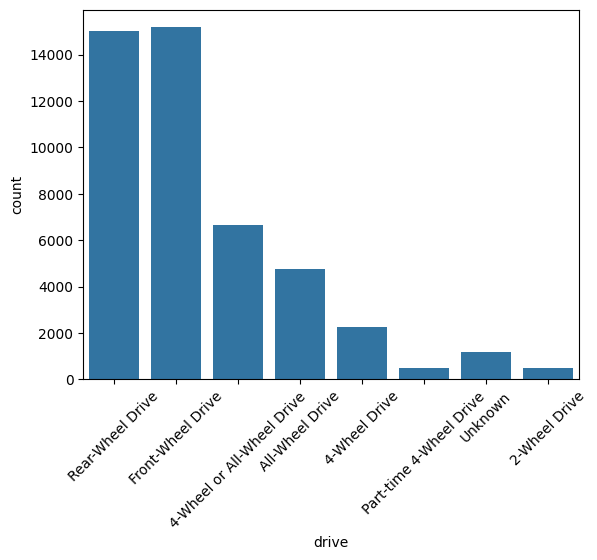

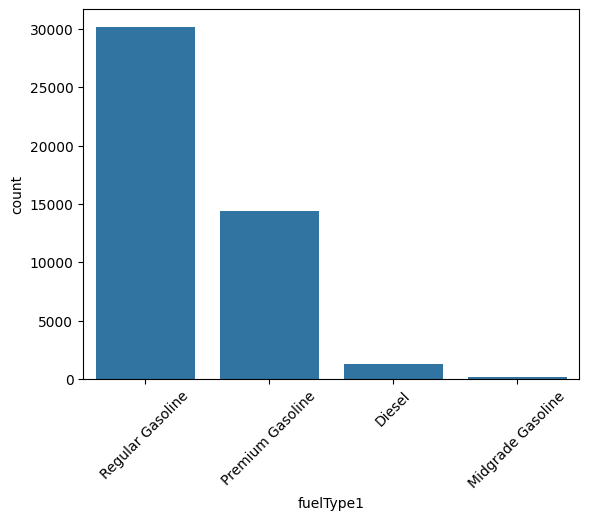

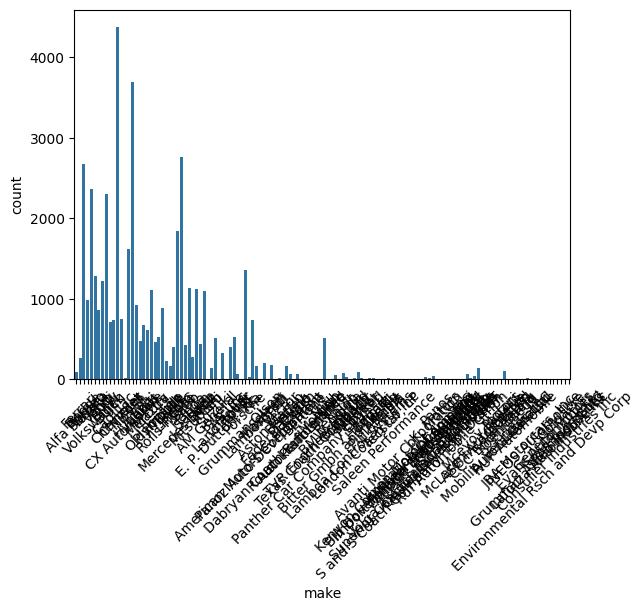

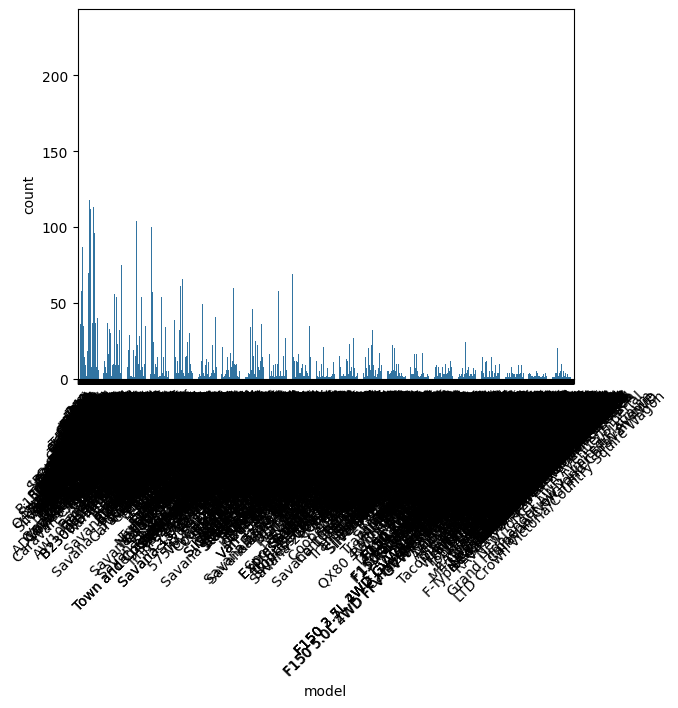

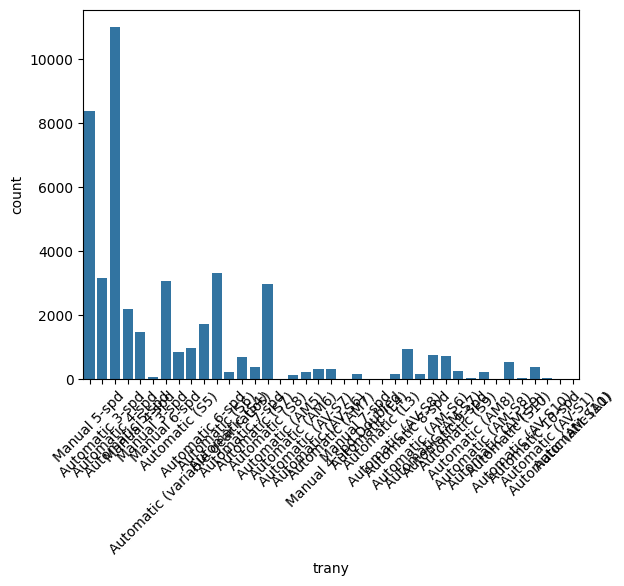

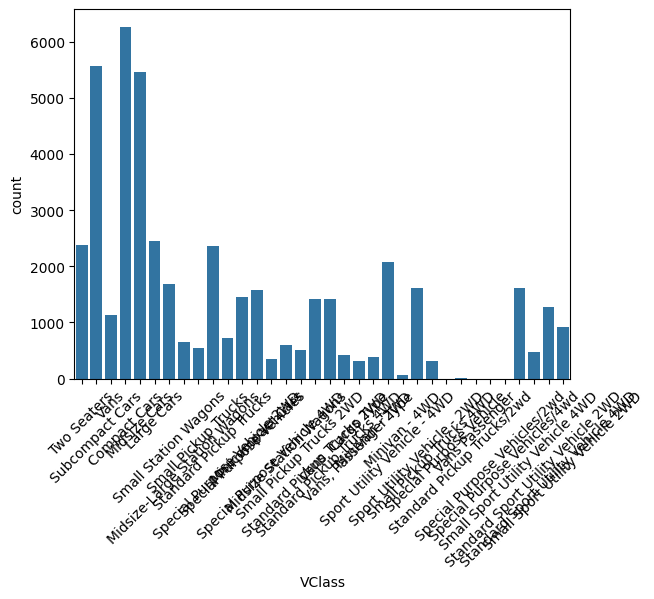

In [49]:
for col in categorical_cols:
    if col != 'id':
        sns.countplot(x=col, data=data)
        plt.xticks(rotation=45)
        plt.show()


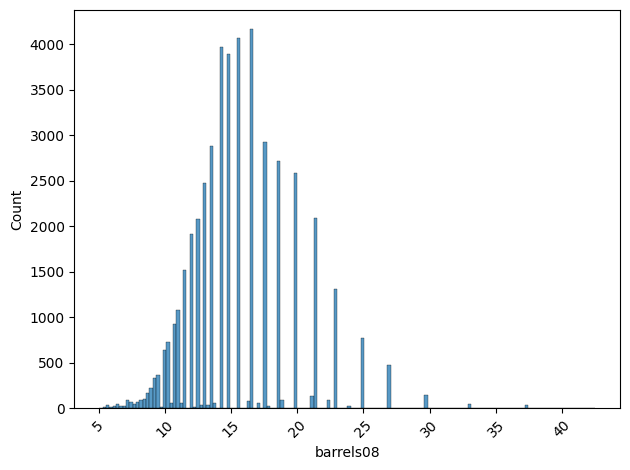

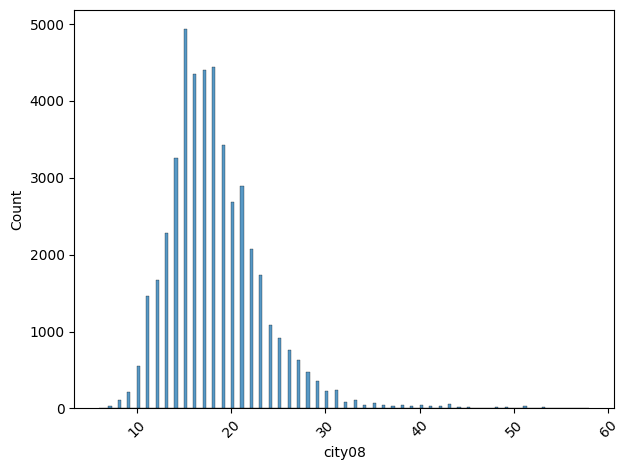

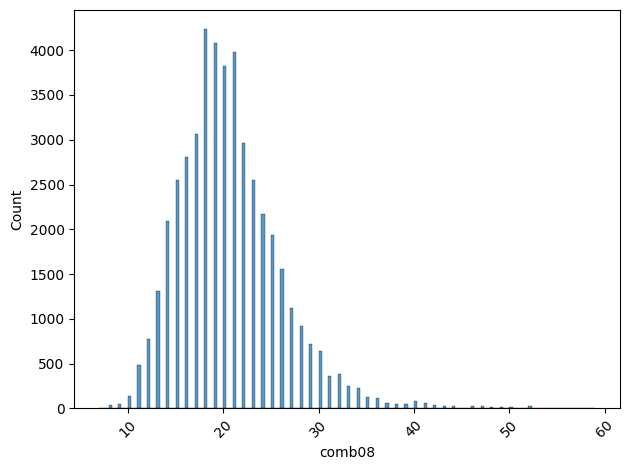

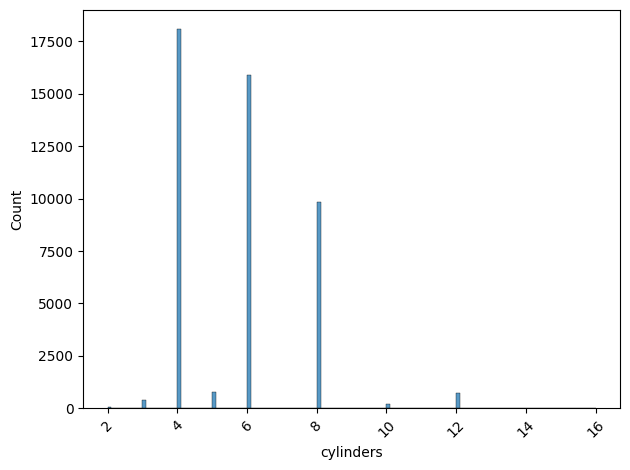

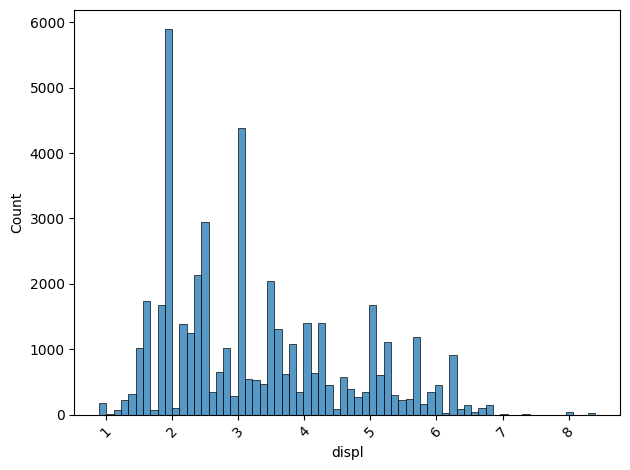

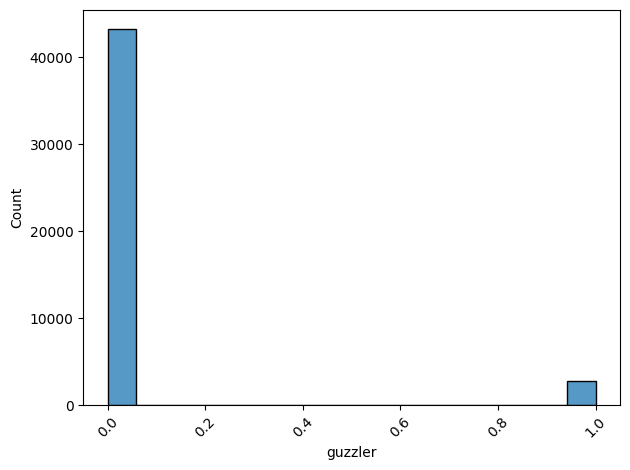

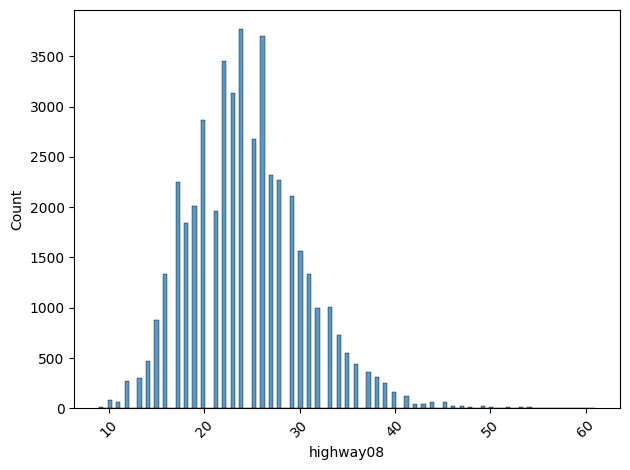

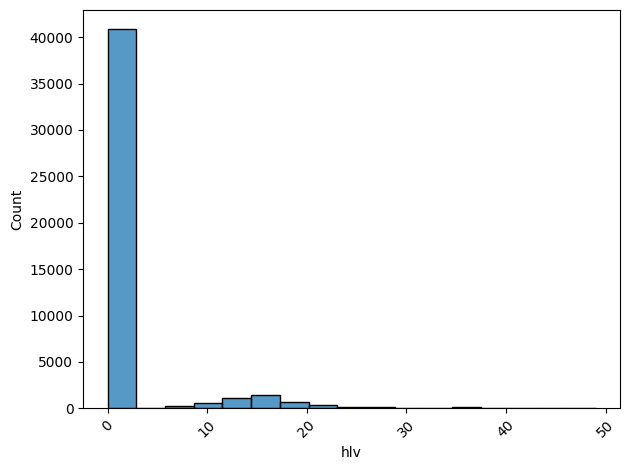

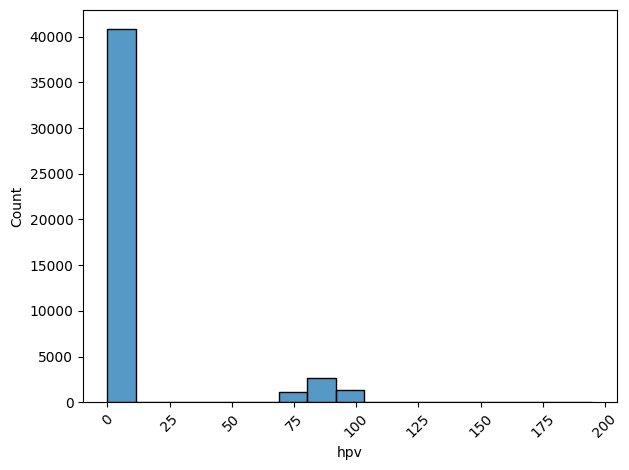

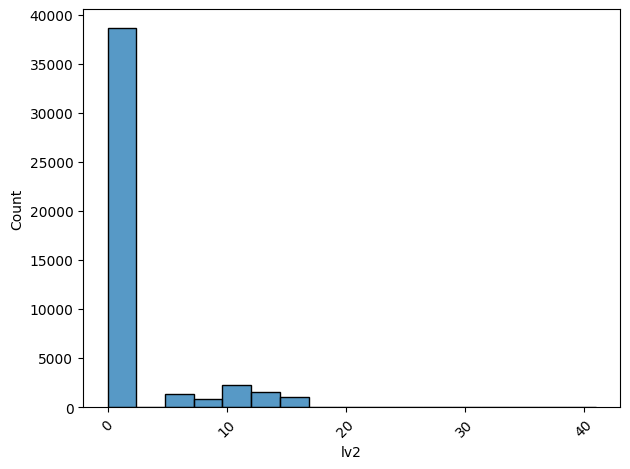

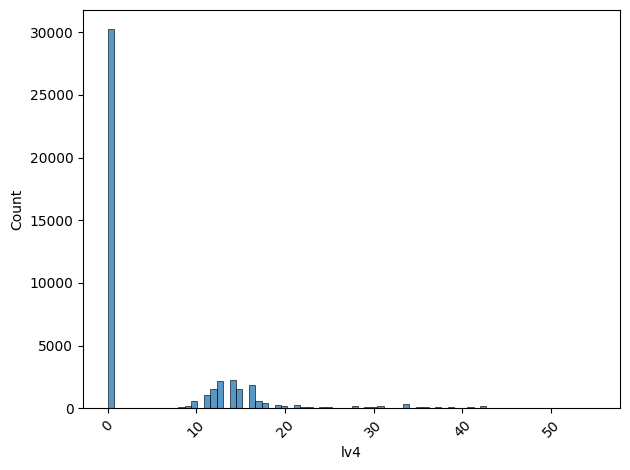

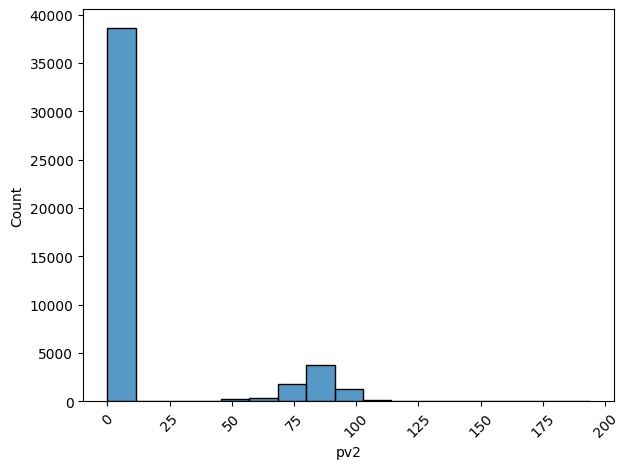

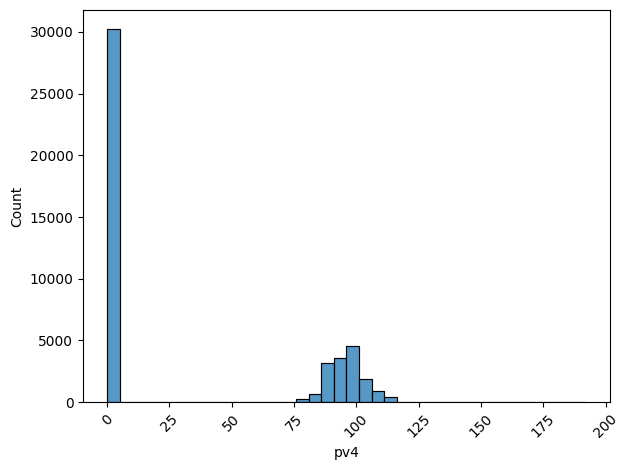

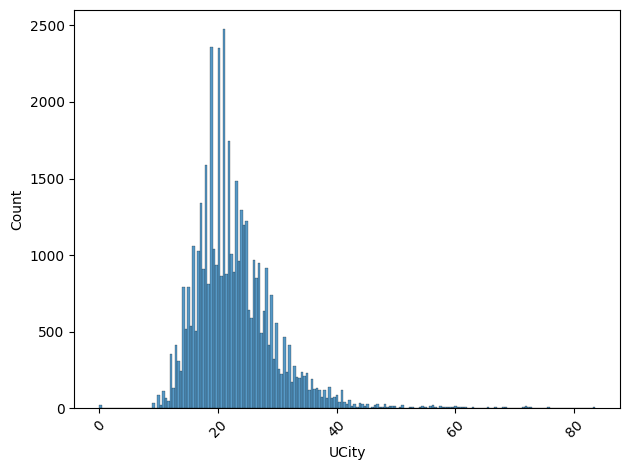

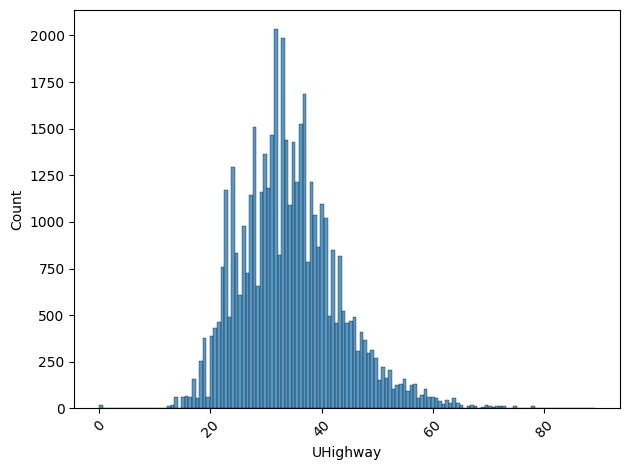

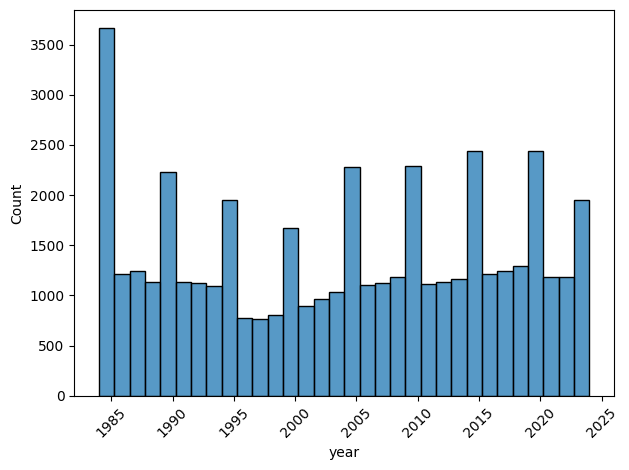

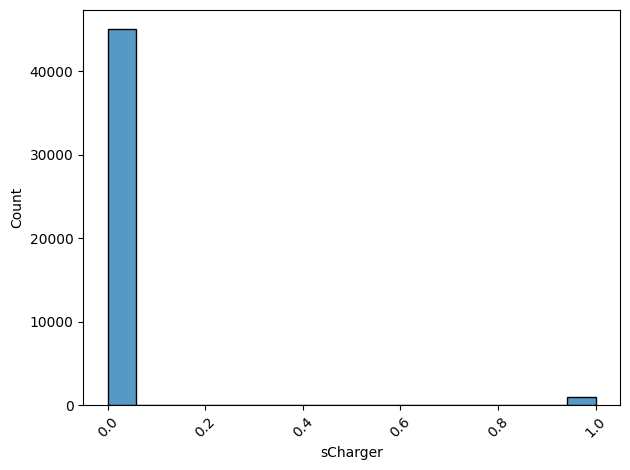

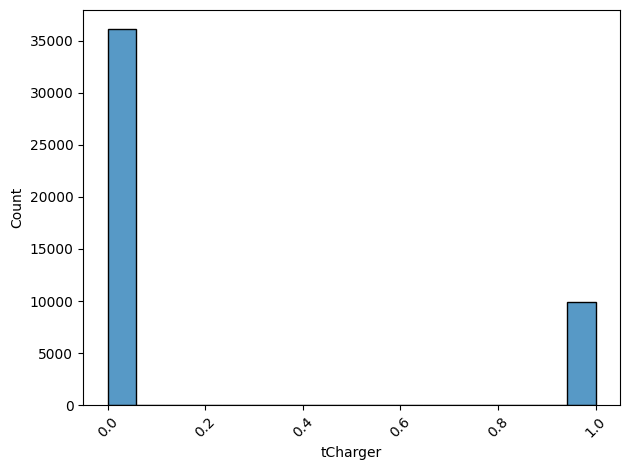

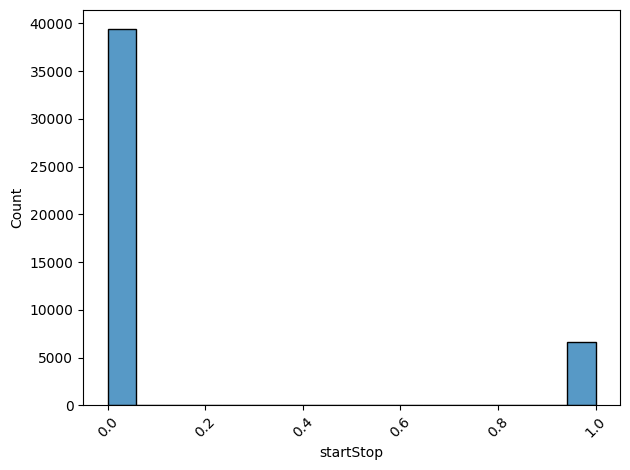

In [50]:
for col in numerical_cols:
    sns.histplot(x=col, data=data)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

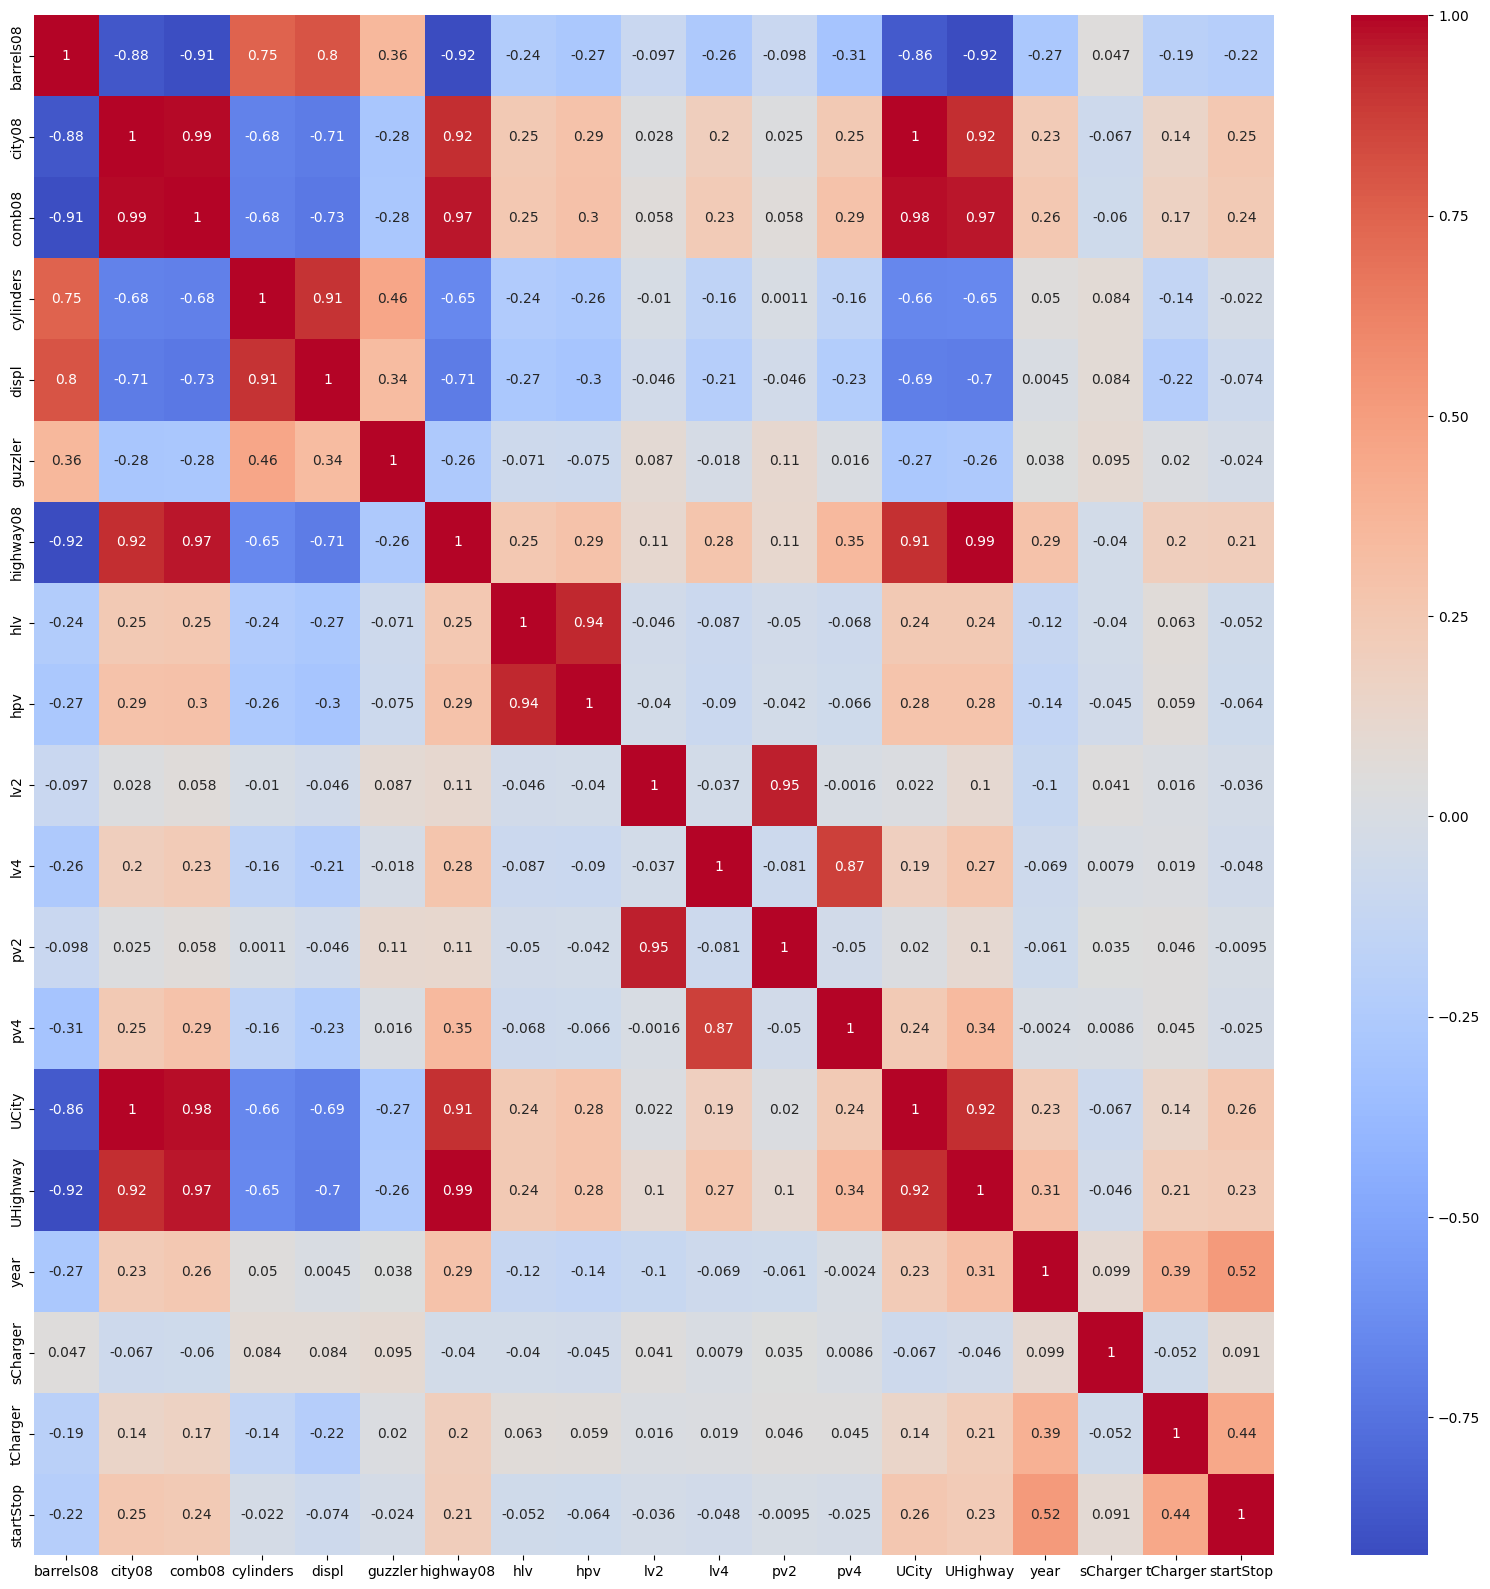

In [51]:
numerical_cols_df = data[numerical_cols]
corr = numerical_cols_df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

- The strong negative correlation between engine size and fuel efficiency is a notable finding, highlighting a trade-off between power and efficiency.
- The presence of turbochargers, superchargers, and start-stop systems doesn't show a strong direct correlation with fuel efficiency metrics in this dataset, which might indicate that these features are more related to performance rather than efficiency, or that their impact on efficiency varies widely depending on the vehicle type and engine.

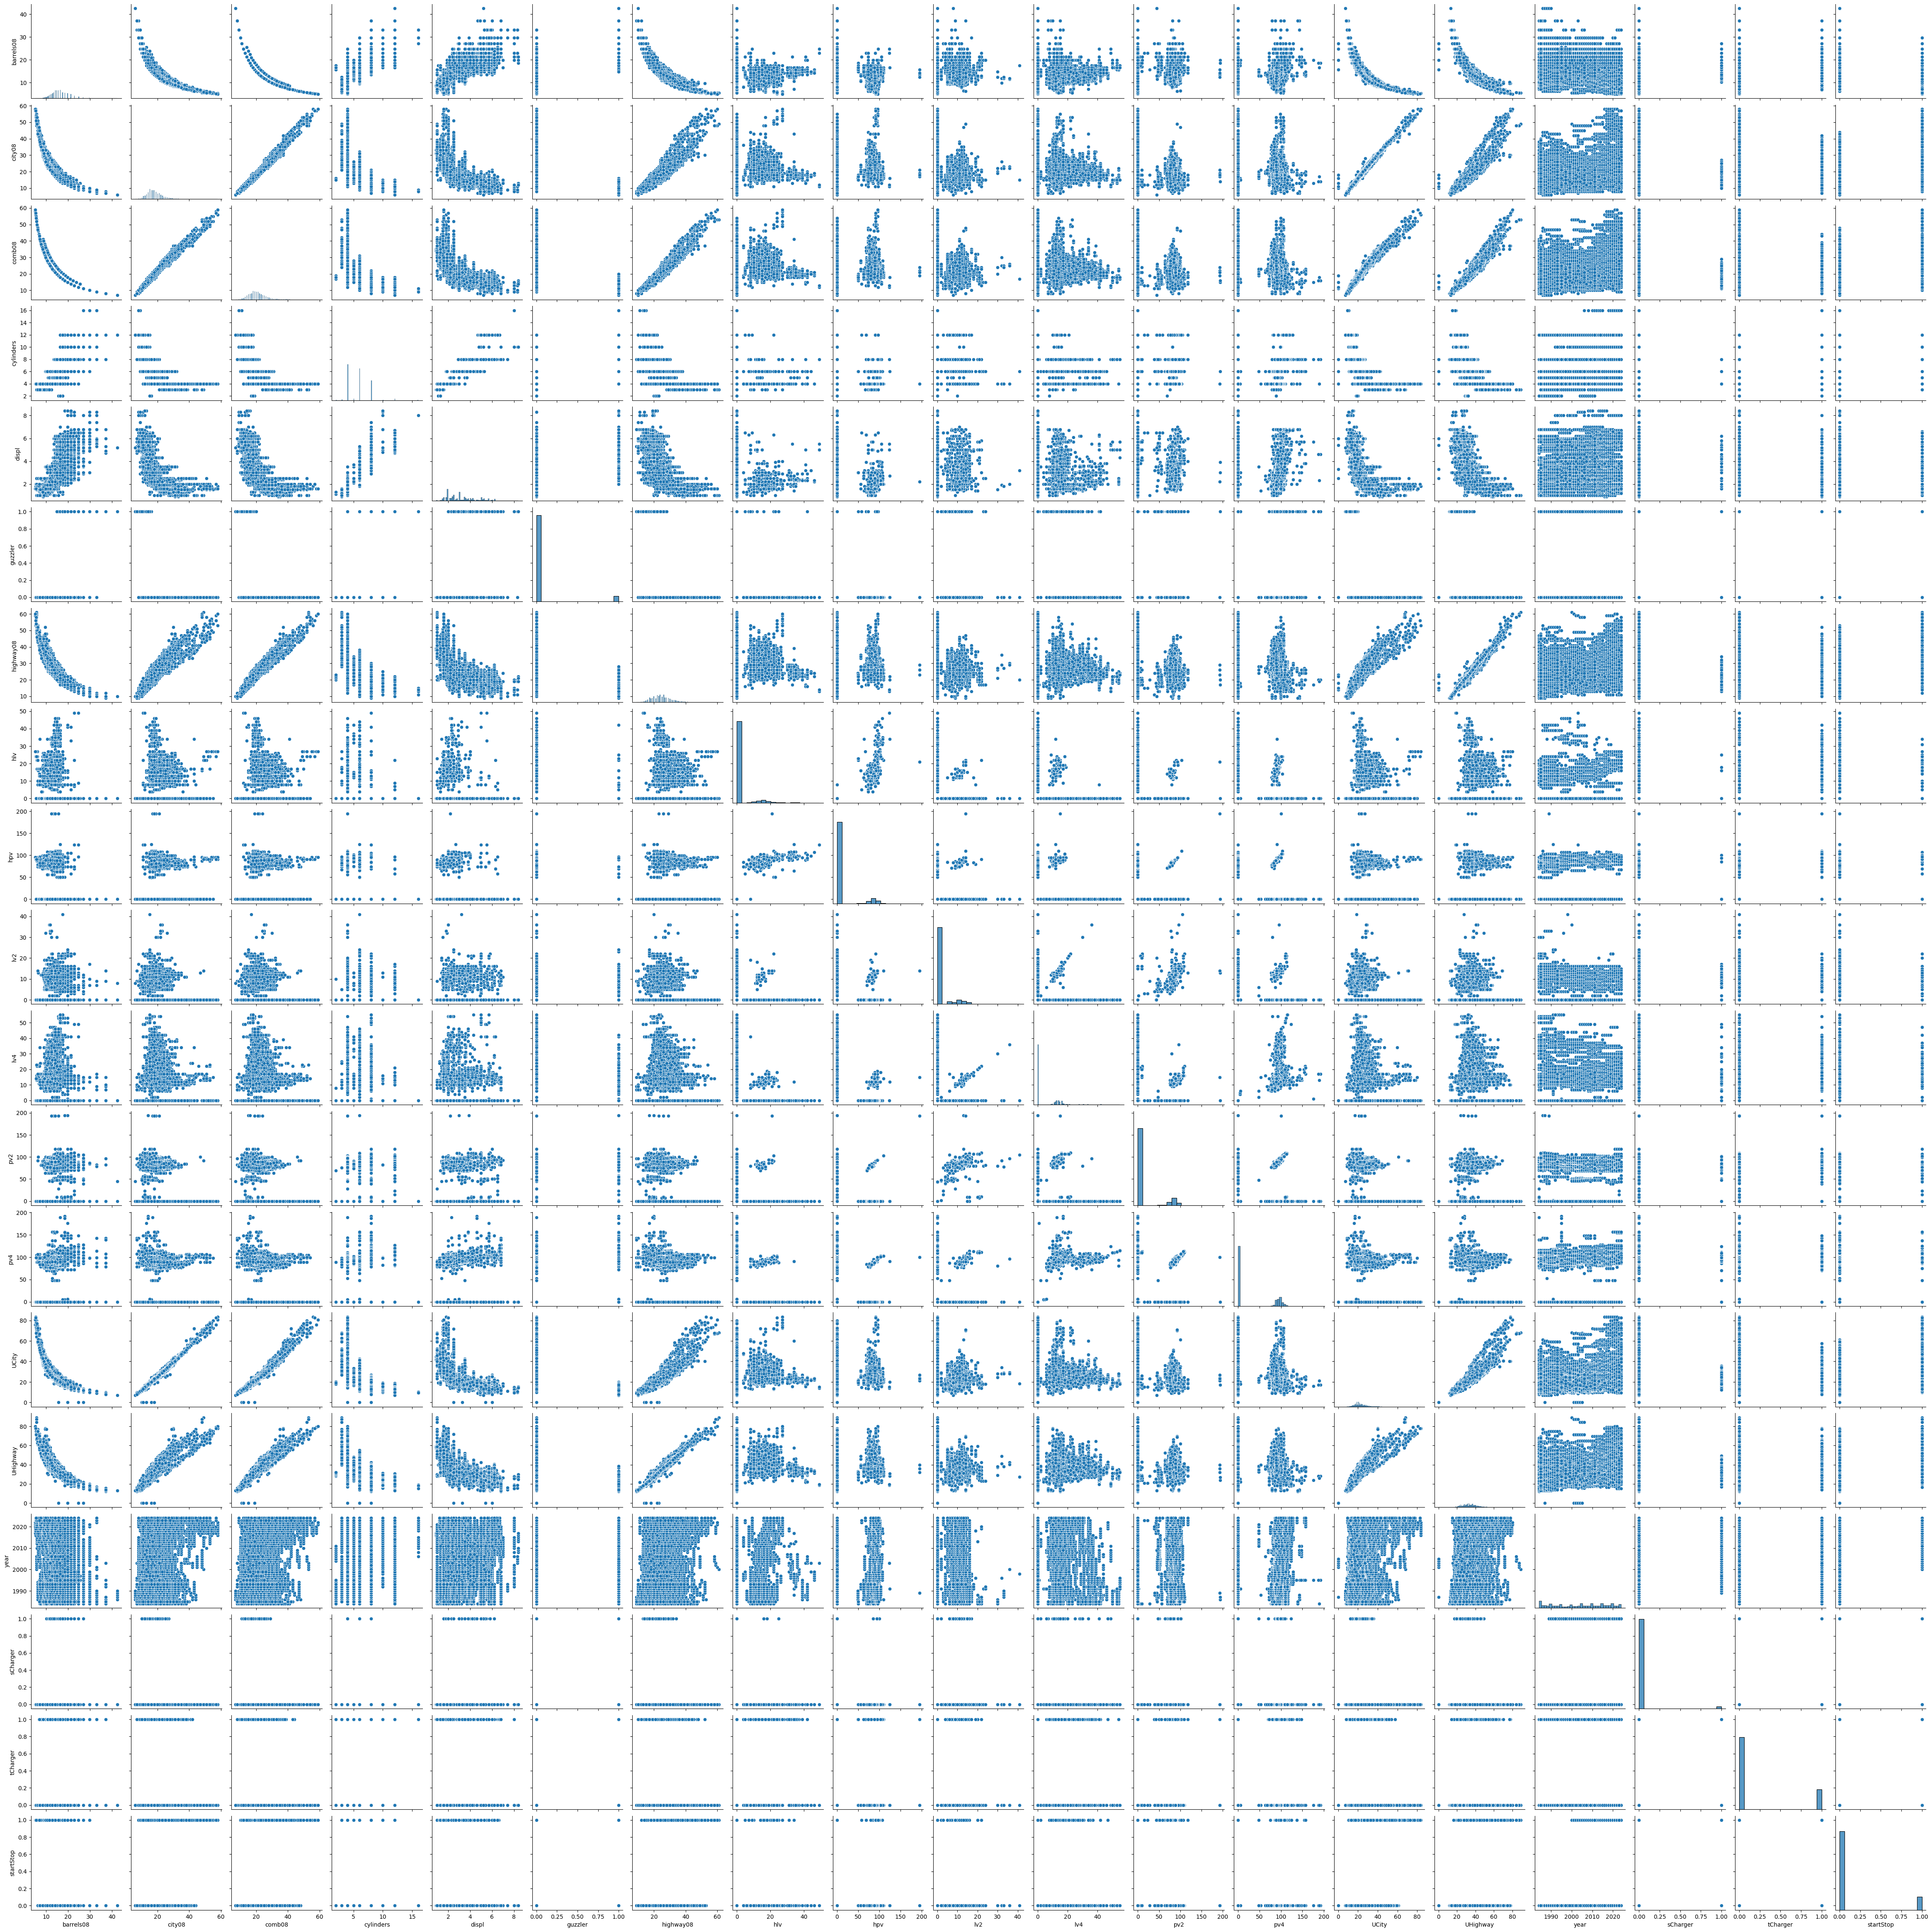

In [52]:
sns.pairplot(numerical_cols_df)

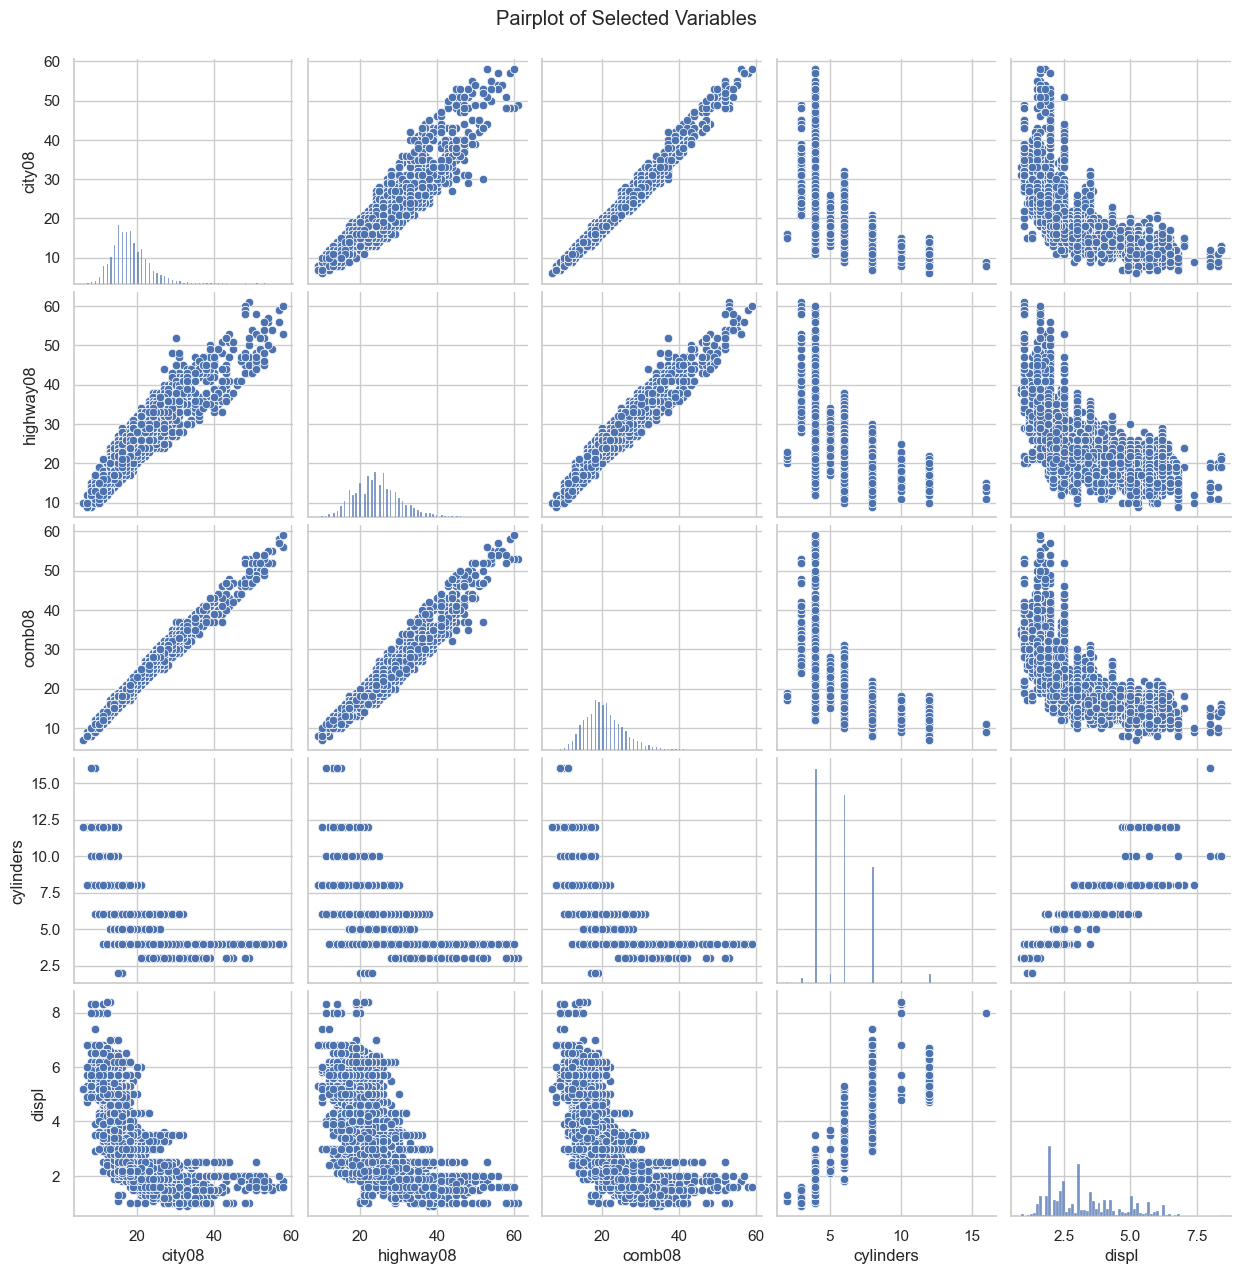

In [55]:
# Creating a smaller pairplot of more relevant variables
pairplot_variables = ['city08', 'highway08', 'comb08', 'cylinders', 'displ']
sns.pairplot(data[pairplot_variables])
plt.suptitle("Pairplot of Selected Variables", y=1.02)
plt.show()



## Pairplot Interpretations

### Fuel Efficiency (MPG) Variables (`city08`, `highway08`, `comb08`)
- **Strong Linear Relationships**: There are strong linear relationships among these variables, indicating consistent fuel efficiency across different driving conditions.
- **Right-Skewed Distributions**: The histograms show right-skewed distributions, with most vehicles having lower MPG values and fewer high-efficiency vehicles.

### Engine Size (`cylinders`, `displ`) vs. MPG (`city08`, `highway08`, `comb08`)
- **Negative Correlation**: There is a clear negative correlation between engine size and MPG. Larger engines (more cylinders, higher displacement) tend to be less fuel-efficient.
- **Variability in Impact**: The scatter plots show variability in how different engine sizes impact fuel efficiency, possibly influenced by factors like vehicle type, technology, and usage.

### Engine Size Relationship (`cylinders` vs. `displ`)
- **Positive Correlation**: A positive correlation is evident between the number of cylinders and engine displacement. More cylinders typically mean larger engine displacements.
- **Linear Relationship**: This relationship is almost linear, reflecting the direct relationship between these two aspects of engine size.

### Distribution of Engine Size (`cylinders`, `displ`)
- **Common Cylinder Counts**: The distribution of `cylinders` shows peaks at common cylinder counts (e.g., 4, 6, 8), typical in the automotive industry.
- **Right-Skewed Engine Displacement**: The distribution of `displ` is right-skewed, indicating a prevalence of smaller engines, with fewer larger engines.


In [53]:
data.describe()

barrels08        city08        comb08     cylinders         displ  \
count  46019.000000  46019.000000  46019.000000  46019.000000  46019.000000   
mean      15.535097     18.226515     20.520415      5.711945      3.282520   
std        3.956320      5.183111      5.422706      1.772648      1.355137   
min        5.042542      6.000000      7.000000      2.000000      0.900000   
25%       12.935217     15.000000     17.000000      4.000000      2.200000   
50%       14.875500     17.000000     20.000000      6.000000      3.000000   
75%       17.500588     21.000000     23.000000      6.000000      4.200000   
max       42.501429     58.000000     59.000000     16.000000      8.400000   

            guzzler     highway08           hlv           hpv           lv2  \
count  46019.000000  46019.000000  46019.000000  46019.000000  46019.000000   
mean       0.059780     24.455899      1.878094      9.595602      1.760968   
std        0.237081      6.020077      5.768338     27.253570      4.293734   
min        0.000000      9.000000      0.000000      0.000000      0.000000   
25%        0.000000     20.000000      0.000000      0.000000      0.000000   
50%        0.000000     24.000000      0.000000      0.000000      0.000000   
75%        0.000000     28.000000      0.000000      0.000000      0.000000   
max        1.000000     61.000000     49.000000    195.000000     41.000000   

                lv4           pv2           pv4         UCity      UHighway  \
count  46019.000000  46019.000000  46019.000000  46019.000000  46019.000000   
mean       5.899476     13.334297     32.889415     23.003855     34.383560   
std        9.464256     30.854050     45.861032      7.234628      9.012595   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000     18.500000     28.000000   
50%        0.000000      0.000000      0.000000     21.800000     33.548100   
75%       13.000000      0.000000     91.000000     26.100000     39.532900   
max       55.000000    194.000000    192.000000     83.559800     89.202900   

               year      sCharger      tCharger     startStop  
count  46019.000000  46019.000000  46019.000000  46019.000000  
mean    2003.776462      0.021057      0.215042      0.143310  
std       12.344221      0.143574      0.410856      0.350393  
min     1984.000000      0.000000      0.000000      0.000000  
25%     1992.000000      0.000000      0.000000      0.000000  
50%     2005.000000      0.000000      0.000000      0.000000  
75%     2015.000000      0.000000      0.000000      0.000000  
max     2024.000000      1.000000      1.000000      1.000000

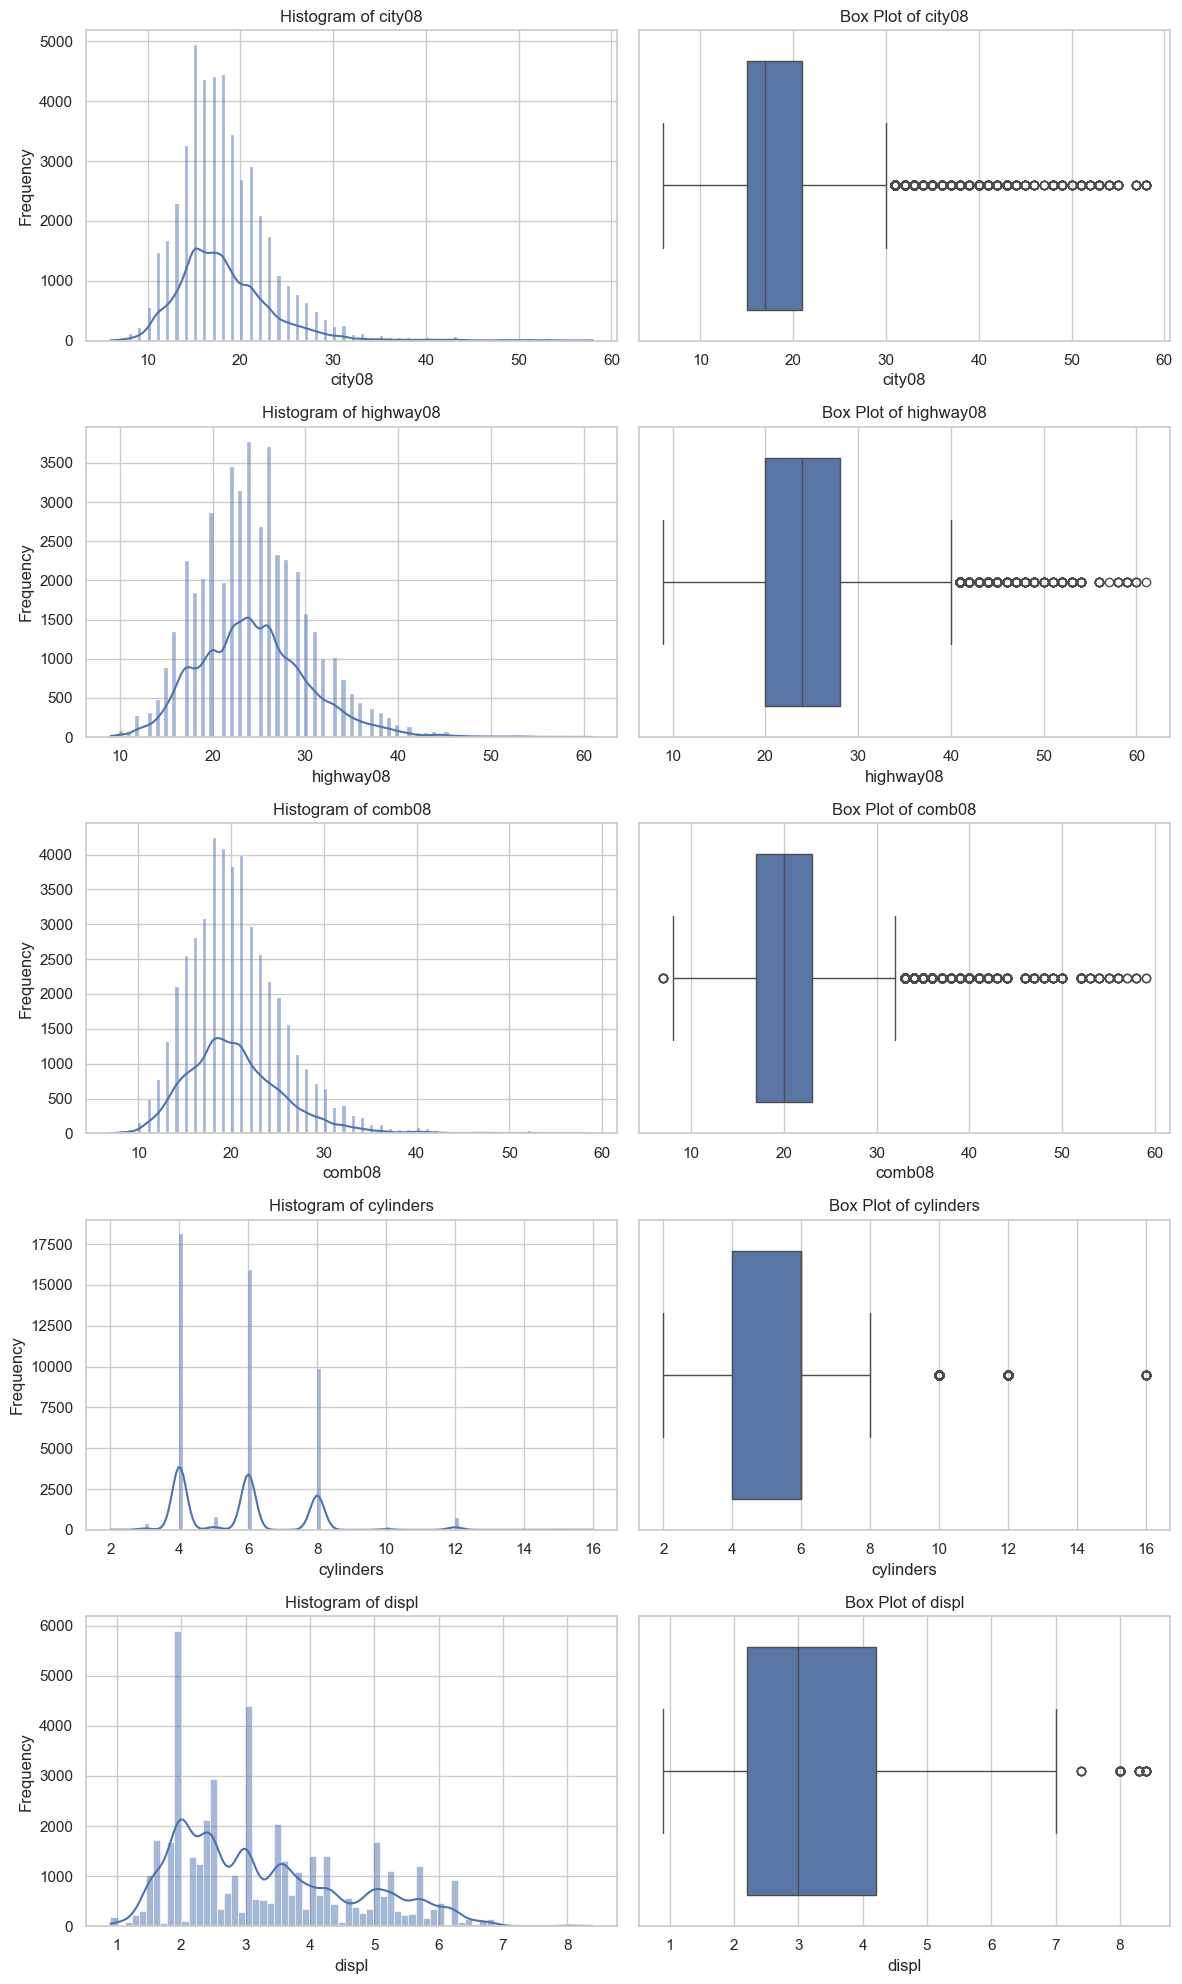

In [54]:
# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Selecting key variables for distribution analysis
variables = ['city08', 'highway08', 'comb08', 'cylinders', 'displ']

# Creating histograms and box plots for each variable
fig, axes = plt.subplots(len(variables), 2, figsize=(12, len(variables) * 4))

for i, var in enumerate(variables):
    # Histogram
    sns.histplot(data[var], ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'Histogram of {var}')
    axes[i, 0].set_xlabel(var)
    axes[i, 0].set_ylabel('Frequency')

    # Box Plot
    sns.boxplot(x=data[var], ax=axes[i, 1])
    axes[i, 1].set_title(f'Box Plot of {var}')
    axes[i, 1].set_xlabel(var)

plt.tight_layout()
plt.show()

- The skewness in MPG distributions suggests that most vehicles are concentrated in the lower MPG ranges, with fewer high-efficiency vehicles.
- Outliers in MPG variables might represent particularly efficient vehicles, electric vehicles, or data entry errors.
- The spread in cylinders and displ reflects the variety of vehicle types and engine sizes, from small economy cars to larger trucks or performance vehicles.

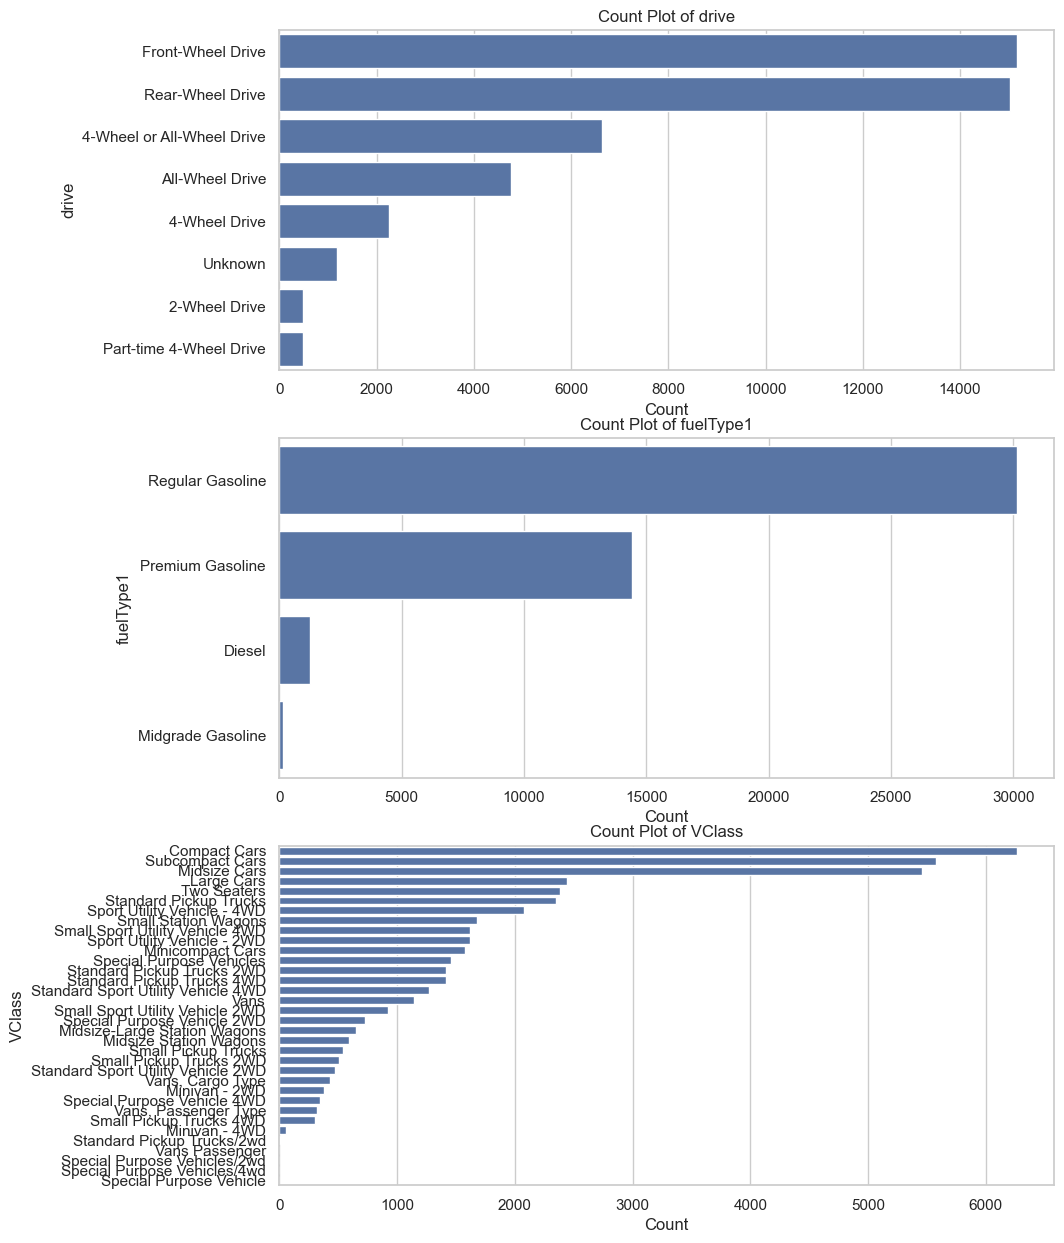

In [56]:
# Identifying main categorical variables and analyzing them
categorical_variables = ['drive', 'fuelType1', 'VClass']

# Creating bar charts for each categorical variable
fig, axes = plt.subplots(len(categorical_variables), 1, figsize=(10, 5 * len(categorical_variables)))

for i, var in enumerate(categorical_variables):
    sns.countplot(y=var, data=data, ax=axes[i], order = data[var].value_counts().index)
    axes[i].set_title(f'Count Plot of {var}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel(var)

- The distribution of the 'drive' type reflects common vehicle designs, with front-wheel and rear-wheel drives being the most prevalent.
- The predominance of vehicles using Regular Gasoline indicates a focus on standard consumer vehicles in the dataset.
- The diversity in the 'VClass' variable highlights the wide range of vehicle types, from compact cars to trucks and SUVs, offering insights into the vehicle market composition.

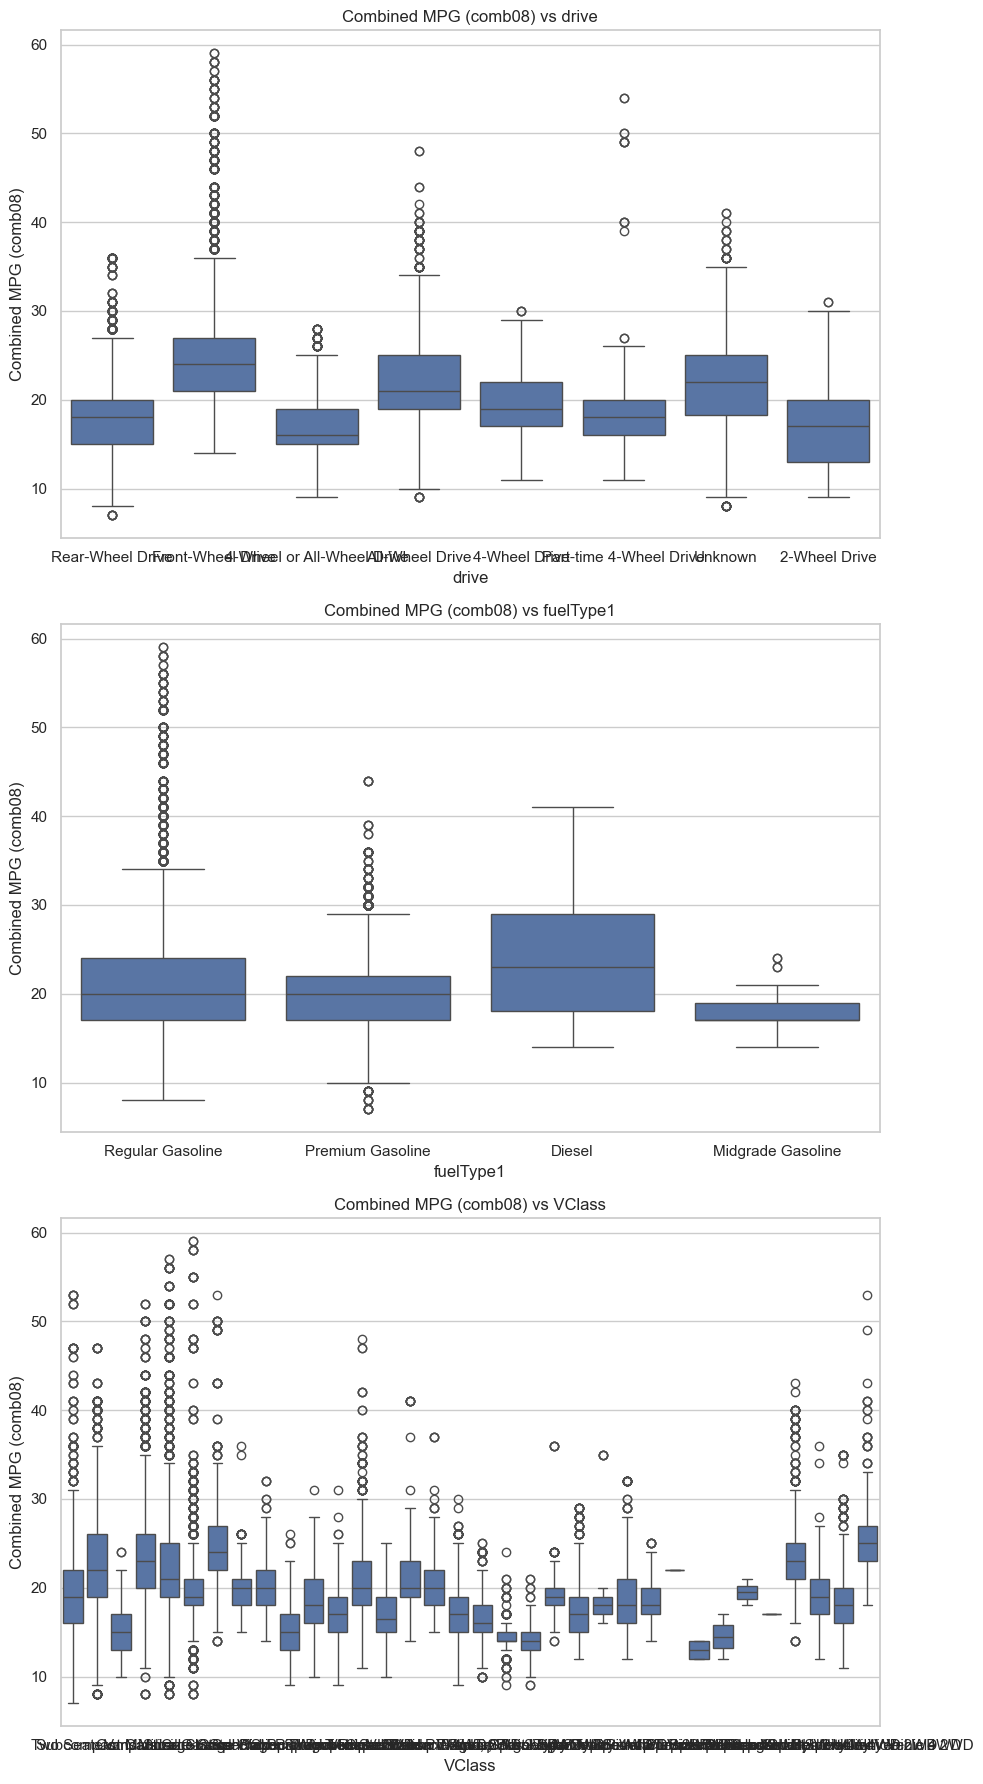

In [57]:
# Creating box plots for categorical variables against 'comb08' (Combined MPG)
fig, axes = plt.subplots(len(categorical_variables), 1, figsize=(10, 6 * len(categorical_variables)))

for i, var in enumerate(categorical_variables):
    sns.boxplot(x=var, y='comb08', data=data, ax=axes[i])
    axes[i].set_title(f'Combined MPG (comb08) vs {var}')
    axes[i].set_ylabel('Combined MPG (comb08)')
    axes[i].set_xlabel(var)

plt.tight_layout()
plt.show()



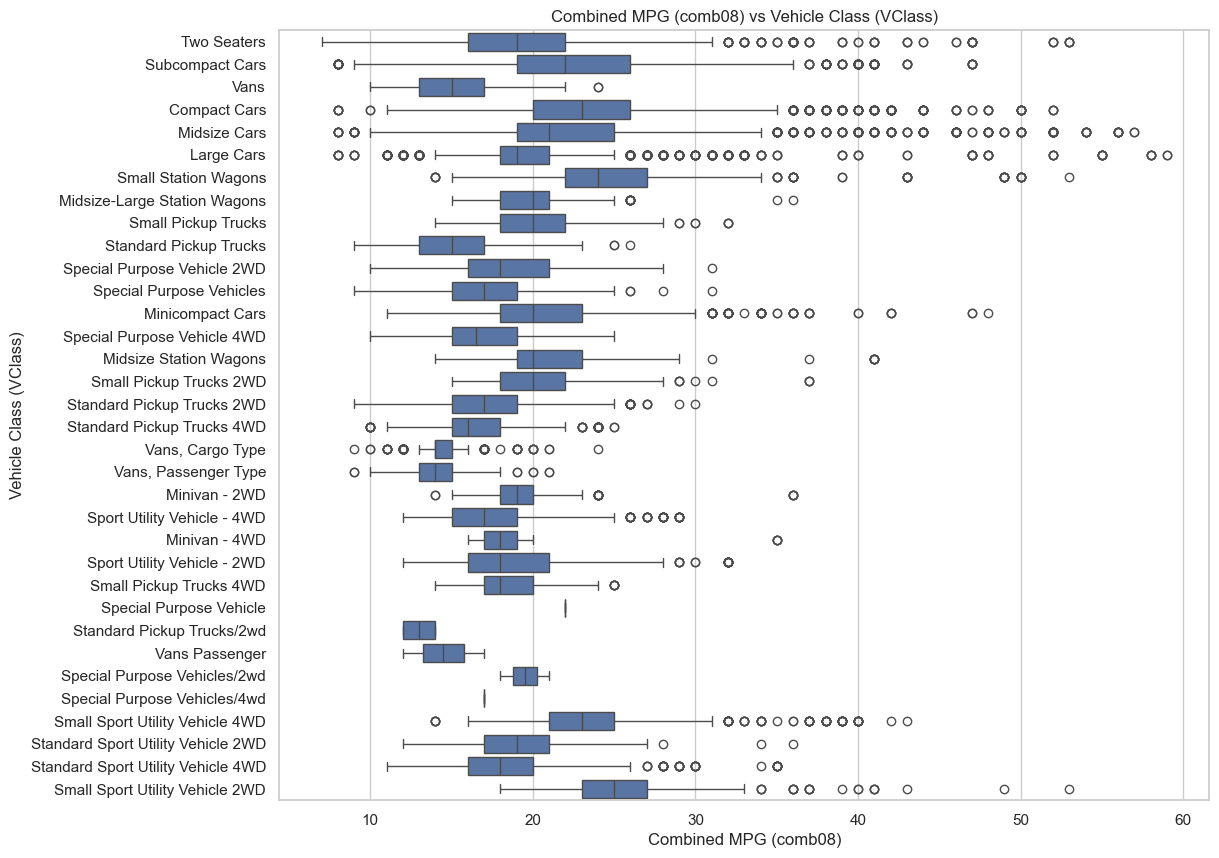

In [58]:
#Vizualizing the graph above in a different way
plt.figure(figsize=(12, 10))
sns.boxplot(y='VClass', x='comb08', data=data_cleaned)
plt.title('Combined MPG (comb08) vs Vehicle Class (VClass)')
plt.xlabel('Combined MPG (comb08)')
plt.ylabel('Vehicle Class (VClass)')
plt.show()



### Combined MPG vs. Drive Type (`drive`):
- Different drive types show varying levels of fuel efficiency. For example, **Front-Wheel Drive** and **All-Wheel Drive** vehicles tend to have higher MPG, while **4-Wheel Drive** vehicles generally have lower MPG.
- The 'Unknown' category has a wide range, indicating variability in the types of vehicles with missing drive information.

### Combined MPG vs. Fuel Type (`fuelType1`):
- **Regular Gasoline** and **Diesel** vehicles show a wide range of MPG values.
- **Premium Gasoline** vehicles tend to have a lower MPG overall, which could be related to higher performance or larger engine vehicles that typically use premium fuel.
- **Midgrade Gasoline** vehicles show a smaller range but are less common.

### Combined MPG vs. Vehicle Class (`VClass`):
- There's a noticeable variation in MPG across different vehicle classes. For instance, **Compact Cars** and **Subcompact Cars** generally have higher MPG, while larger vehicles like **Large Cars** and **Standard Pickup Trucks** have lower MPG.
- **Two Seaters** and **Sports Utility Vehicles (SUVs)** show a wide range of efficiency, reflecting the diversity within these categories.


#### Summary:
- Drive type, fuel type, and vehicle class significantly impact fuel efficiency. This is evident from the variations in MPG across different categories.
- The data suggests a trade-off between vehicle size or performance and fuel efficiency, with larger or higher-performance vehicles generally having lower MPG.

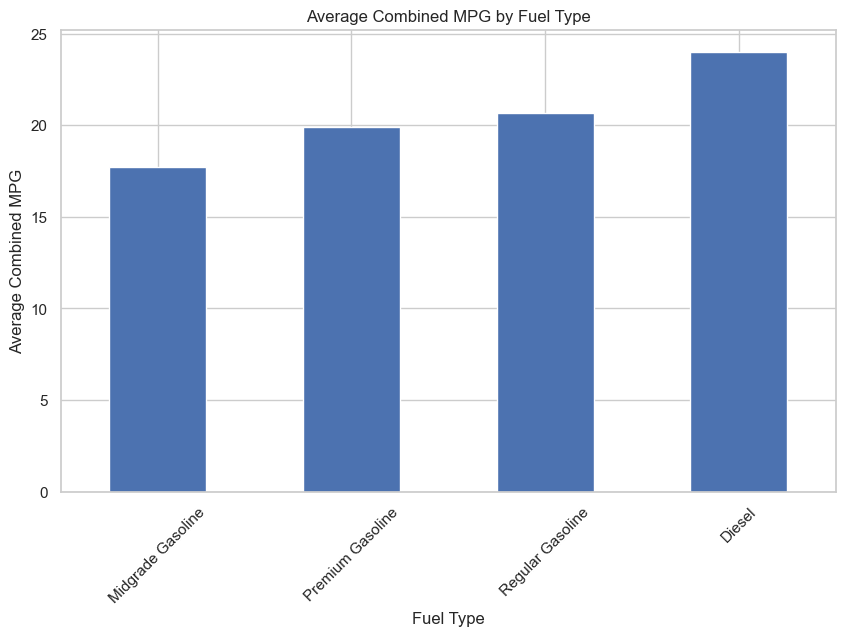

fuelType1
Midgrade Gasoline    17.722222
Premium Gasoline     19.922901
Regular Gasoline     20.673508
Diesel               24.016484
Name: comb08, dtype: float64

In [59]:
# Comparison by Fuel Type
fuel_type_comparison = data.groupby('fuelType1')['comb08'].mean().sort_values()

# Creating a bar plot for fuel type comparison
plt.figure(figsize=(10, 6))
fuel_type_comparison.plot(kind='bar')
plt.title('Average Combined MPG by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Combined MPG')
plt.xticks(rotation=45)
plt.show()

fuel_type_comparison



#### Diesel: 
- Has the highest average combined MPG among the fuel types. This is consistent with the generally higher efficiency of diesel engines.
#### Regular Gasoline: 
- Comes next in terms of efficiency. Vehicles using regular gasoline have a decent average MPG, making them a common choice for standard consumer vehicles.
#### Premium Gasoline: 
- These vehicles have a lower average MPG compared to regular gasoline. This could be due to premium gasoline often being used in higher-performance or larger engine vehicles, which tend to be less fuel-efficient.
#### Midgrade Gasoline: 
- Shows the lowest average MPG, although it's important to note that this category has fewer vehicles, which might affect the average.
#### Summary:

- The fuel type is a significant factor in vehicle fuel efficiency, with diesel engines showing notably higher efficiency on average.
- The lower efficiency of premium gasoline vehicles aligns with their typical use in performance-oriented or luxury vehicles.

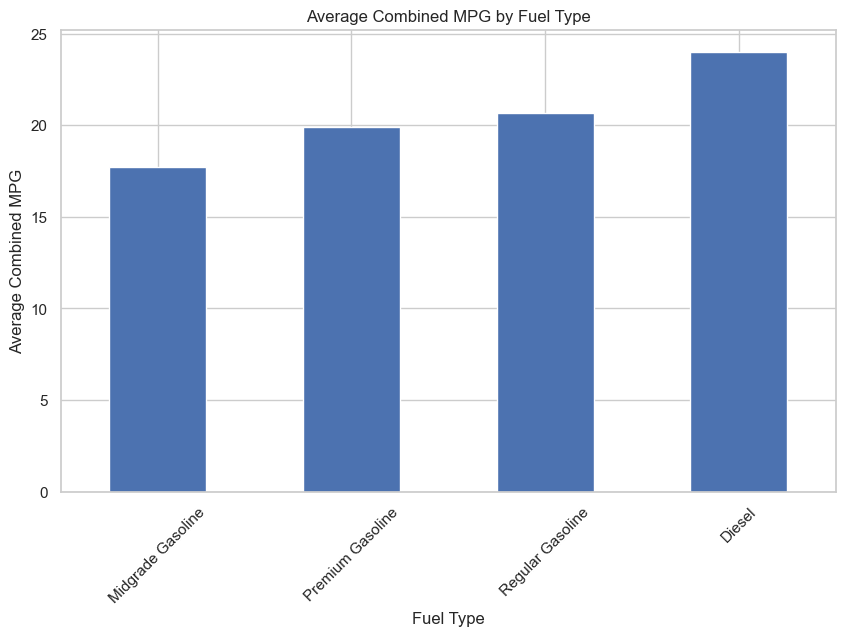

fuelType1
Midgrade Gasoline    17.722222
Premium Gasoline     19.922901
Regular Gasoline     20.673508
Diesel               24.016484
Name: comb08, dtype: float64

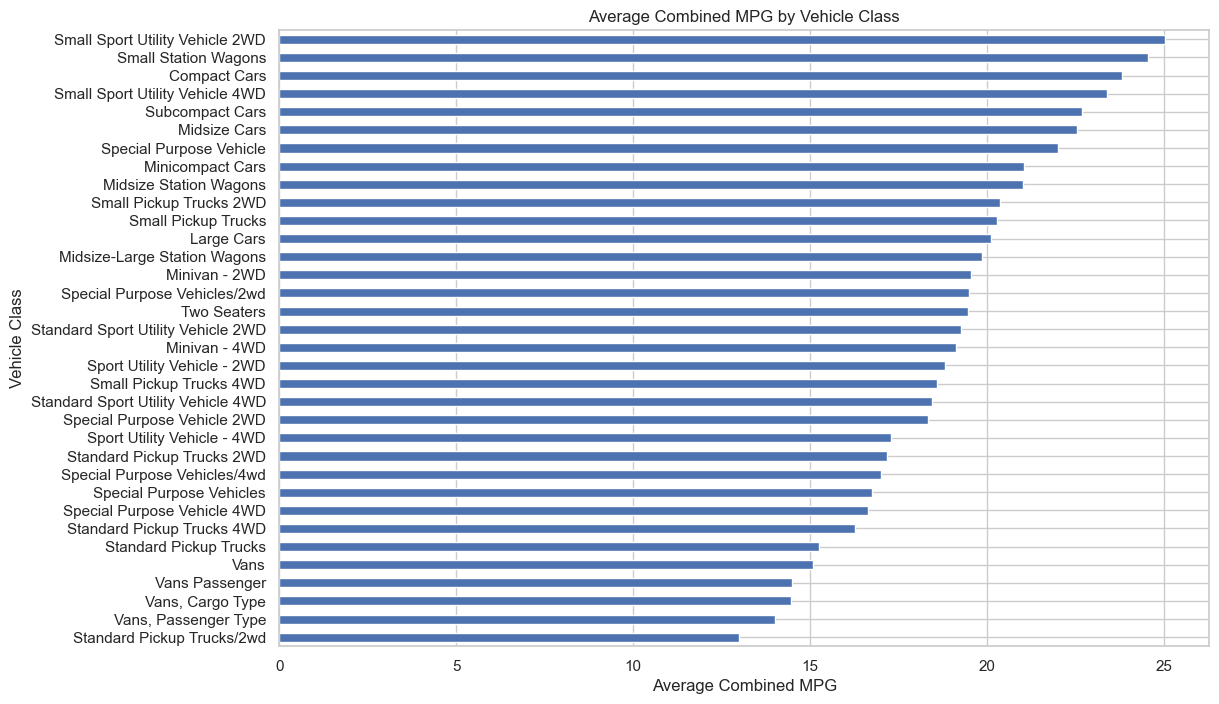

VClass
Standard Pickup Trucks/2wd            13.000000
Vans, Passenger Type                  14.000000
Vans, Cargo Type                      14.475524
Vans Passenger                        14.500000
Vans                                  15.092025
Standard Pickup Trucks                15.241716
Standard Pickup Trucks 4WD            16.262898
Special Purpose Vehicle 4WD           16.639535
Special Purpose Vehicles              16.764261
Special Purpose Vehicles/4wd          17.000000
Standard Pickup Trucks 2WD            17.172195
Sport Utility Vehicle - 4WD           17.279115
Special Purpose Vehicle 2WD           18.340164
Standard Sport Utility Vehicle 4WD    18.443218
Small Pickup Trucks 4WD               18.594771
Sport Utility Vehicle - 2WD           18.805435
Minivan - 4WD                         19.135593
Standard Sport Utility Vehicle 2WD    19.261146
Two Seaters                           19.455042
Special Purpose Vehicles/2wd          19.500000
Minivan - 2WD                    

In [61]:
# Vehicle Class Comparison
vehicle_class_comparison = data.groupby('VClass')['comb08'].mean().sort_values()

# Creating a bar plot for vehicle class comparison
plt.figure(figsize=(12, 8))
vehicle_class_comparison.plot(kind='barh')
plt.title('Average Combined MPG by Vehicle Class')
plt.xlabel('Average Combined MPG')
plt.ylabel('Vehicle Class')
plt.show()

vehicle_class_comparison



### Higher Efficiency Classes:
- **Smaller Vehicle Classes**: Such as Small Sport Utility Vehicles (2WD), Small Station Wagons, Compact Cars, and Subcompact Cars tend to have higher average MPG. This is indicative of their smaller size and more efficient engines.

### Moderate Efficiency:
- **Mid-Range Classes**: Midsize Cars, Minicompact Cars, and Midsize Station Wagons fall into the mid-range of fuel efficiency.

### Lower Efficiency Classes:
- **Larger Vehicles**: Such as Large Cars, Standard Sport Utility Vehicles (both 4WD and 2WD), and different types of Vans and Pickup Trucks, generally have lower average MPG. This aligns with the larger size and often more powerful engines in these vehicles, which typically result in lower fuel efficiency.

### Summary:
- **Impact of Vehicle Class**: The vehicle class significantly impacts fuel efficiency, with a clear trend showing that smaller vehicles tend to be more fuel-efficient than larger ones.
- **Diversity Within Categories**: The diversity in MPG within categories like Two Seaters and Sport Utility Vehicles suggests a wide range of designs and purposes within these classes, from high-performance models to more efficiency-focused designs.


In [62]:
selected_features = ['cylinders', 'displ', 'fuelType1', 'trany', 'drive', 'VClass', 
                     'tCharger', 'sCharger', 'startStop']

# Checking for missing values in these features
missing_values_check = data[selected_features].isnull().sum()

# Displaying the missing values
missing_values_check



cylinders    0
displ        0
fuelType1    0
trany        0
drive        0
VClass       0
tCharger     0
sCharger     0
startStop    0
dtype: int64